In [15]:
## Import packages 
import requests
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [71]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.2)
color = sns.color_palette("tab10", 10)[0]

In [2]:
## define variables needed for all functions
api_key = 'AgBiJtYweO2YqUCaDeNV05h1bMA3fTkI6LdeMhXr'

headers = {
    'accept': 'application/json',
    'x-api-key': api_key,
}

In [3]:
#### Required parameter:
# mmsi: vesselid --MMSI associated to the vessel to acquire historical position data for
#### Optional prameter:
# age: number of days back the history will cover (1- 90 days) -default set to 90 days
# time: start time for history of vessel search to begin with (time can be up to 2 years old) --- not implement yet
def get_vessel_history(mmsi, age= 90):
  vessel_history_url = 'https://api.seavision.volpe.dot.gov/v1/vessels/'+ str(mmsi)+'/history'
  headers = {
    'accept': 'application/json',
    'x-api-key': api_key,
  }
  params = {
    'age': age,
  }
  response = requests.get(vessel_history_url, params=params, headers=headers)
  result = pd.read_json(response.text)
  ## convert timestamp to datetime and append an additional column to the dataframe
  result['time'] = pd.to_datetime(result['timeOfFix'], unit='s')
  return result



In [6]:
yong = get_vessel_history(357172000)

In [7]:
james = get_vessel_history(368884000)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

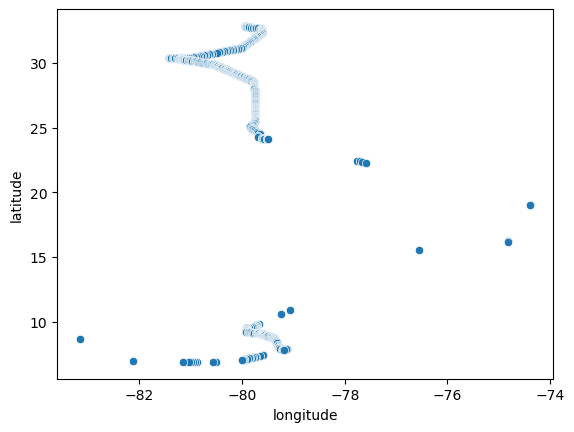

In [13]:
sns.scatterplot(james, y='latitude', x='longitude')

<AxesSubplot: >

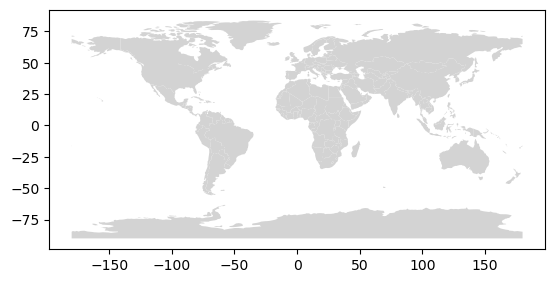

In [16]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey")

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_14195/3479514369.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


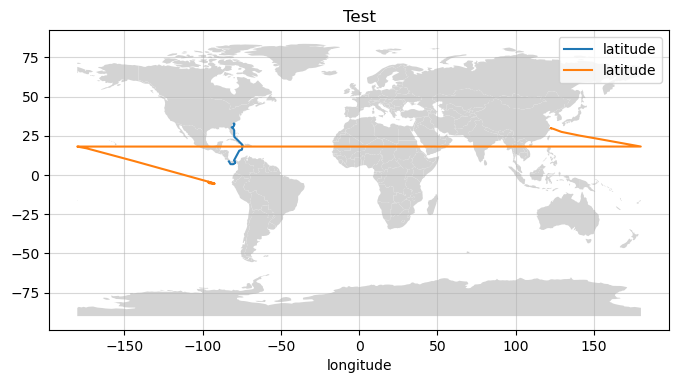

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)
# parse dates for plot's title
# first_month = df["acq_date"].min().strftime("%b %Y")
# last_month = df["acq_date"].max().strftime("%b %Y")
# plot points
james.plot.line(x="longitude", y="latitude", style='-',
        # colormap="YlOrRd", 
        title="Test", 
        ax=ax)
yong.plot.line(x="longitude", y="latitude", style='-',
        # colormap="YlOrRd", 
        title="Test", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [25]:
yong

,latitude,longitude,heading,SOG,timeOfFix,time
0,29.832402,122.494855,111.0,0.2,1668031842,2022-11-09 22:10:42
1,29.832505,122.494900,114.0,0.2,1668030403,2022-11-09 21:46:43
2,29.832123,122.497245,110.0,0.3,1668027166,2022-11-09 20:52:46
3,29.833780,122.494185,54.0,0.2,1667857949,2022-11-07 21:52:29
4,29.832845,122.496262,3.0,0.4,1667848228,2022-11-07 19:10:28
...,...,...,...,...,...,...
6828,-4.360742,-96.149890,49.0,1.3,1660346478,2022-08-12 23:21:18
6829,-4.360758,-96.149773,49.0,1.2,1660346459,2022-08-12 23:20:59
6830,-4.362378,-96.144710,53.0,1.3,1660345621,2022-08-12 23:07:01
6831,-4.366075,-96.132867,46.0,1.2,1660343700,2022-08-12 22:35:00


In [26]:
carriers = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/carriers.csv')

In [36]:
carriers.loc[carriers['imo']==9067128,:]

,Unnamed: 0,name,callsign,firstTransmissionDate,flag,geartype,id,imo,lastTransmissionDate,mmsi,msgCount,posCount,shipname,source,vesselType,years,dataset,score
742,742,743.0,3FBA2,2019-01-18T03:54:17Z,PAN,NaN,99685e398-85f7-7585-33c0-6b4ea458a1d4,9067128.0,2022-11-01T23:57:49Z,357172000,89016142.0,1739385.0,YONG HANG 3,AIS,Carrier,"2019, 2020, 2021, 2022",public-global-carrier-vessels:v20201001,1.0
4031,4031,4032.0,A8JH6,2012-01-02T13:07:49Z,LBR,NaN,b8e609a92-2edb-be0a-98f9-efea953f69f1,9067128.0,2019-01-18T03:47:27Z,636091091,18978775.0,304428.0,FORTUNA BAY,AIS,Carrier,"2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019",public-global-carrier-vessels:v20201001,1.0


In [37]:
encounters = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/encounters.csv')
encounters.loc[(encounters['vessel.mmsi']==357172000)|(encounters['vessel.mmsi']==636091091),:]

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_14195/1664889471.py:1: DtypeWarning: Columns (43,45,48,55) have mixed types. Specify dtype option on import or set low_memory=False.
  encounters = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/encounters.csv')


,Unnamed: 0,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,...,major_fao,eez12nm,boundingBox,startDistanceFromShoreKm,endDistanceFromShoreKm,startDistanceFromPortKm,endDistanceFromPortKm,medianDistanceKilometers,medianSpeedKnots,encounter_type
34634,34634,a1077ca0519ce6823237bfa168639ce8.1,encounter,2022-04-16 17:10:00,2022-04-16 23:50:00,-1.454323,-108.529342,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34635,34635,374978f44db98c7381f1a2c2809612b8.1,encounter,2021-03-10 17:40:00,2021-03-10 23:50:00,-2.972426,-106.420322,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34636,34636,eee31f68dd25dfebd200497a1541aa6f.1,encounter,2020-02-25 13:50:00,2020-02-25 17:00:00,-1.242565,-113.051558,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34637,34637,a7dc59d6d7e60c0ca040f1d60507acaf.1,encounter,2021-03-20 16:30:00,2021-03-20 22:20:00,-3.194292,-107.184473,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34638,34638,bf7018866d84649e1549f13bdb6922bb.1,encounter,2020-02-17 14:10:00,2020-02-17 17:20:00,-0.632129,-108.844779,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35051,35051,d347f79b3b57620df5074c50078d4569.1,encounter,2020-02-15 14:20:00,2020-02-15 20:00:00,-0.351096,-109.136095,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35052,35052,4076c990f6f99a77e718dab7633cc4ba.1,encounter,2021-03-11 18:30:00,2021-03-11 23:50:00,-2.962341,-107.008535,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35053,35053,ed555b74057b7e4d8f272b97c25fb597.1,encounter,2021-03-22 20:40:00,2021-03-22 23:50:00,-3.093010,-105.939421,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35054,35054,3a7012de419bd096b4bde3c8fd94544f.1,encounter,2021-03-15 13:20:00,2021-03-15 17:30:00,-3.309771,-107.776921,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
loitering = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/loitering.csv')
loitering.loc[(loitering['vessel.mmsi']==357172000)|(loitering['vessel.mmsi']==636091091),:]

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_14195/2268009825.py:1: DtypeWarning: Columns (11,12,13,14,15,42,43,44,47,52) have mixed types. Specify dtype option on import or set low_memory=False.
  loitering = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/loitering.csv')


,Unnamed: 0,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,...,boundingBox,startDistanceFromShoreKm,endDistanceFromShoreKm,startDistanceFromPortKm,endDistanceFromPortKm,flag,totalTimeHours,totalDistanceKm,averageSpeedKnots,averageDistanceFromShoreKm
711,711,3bdf8a6f8498f5f6547af91413905ab3,loitering,2019-02-14 18:23:18 UTC,2019-02-17 10:57:06 UTC,16.396382,62.124877,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,1010,19be373d6ef86983233abe238be87d14,loitering,2019-02-13 19:04:48 UTC,2019-02-14 16:45:00 UTC,16.890228,62.202856,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,1548,2c1bfce25591dba5840075288b85f47a,loitering,2019-02-11 18:39:00 UTC,2019-02-13 06:48:57 UTC,17.375555,61.376131,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856,2856,c1c3f08c704fab19368f4ee4d9692acd,loitering,2012-10-21 03:33:55 UTC,2012-10-21 07:08:54 UTC,31.191000,-36.461167,b8e609a92-2edb-be0a-98f9-efea953f69f1,carrier,636091091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4653,4653,78d3e186347c1d07d3a5d20921e90be0,loitering,2019-02-10 19:35:33 UTC,2019-02-11 07:15:43 UTC,18.067613,61.743240,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274487,245617,343abb68bb002239eaa2ac172aab7d6b,loitering,2021-08-30 05:59:34,2021-08-30 06:50:35,-10.491500,-89.749400,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,"-89.759525, -10.48491, -89.7393433333, -10.498...",1004.0,1006.0,1016.394312,1018.594062,PAN,0.850278,2.751374,1.747221,1005.683572
276245,257476,3209198225a5e20d542a86cf9143814f,loitering,2022-01-18 05:59:54,2022-01-18 06:53:14,-4.880800,-104.586700,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,"-104.5769466667, -4.890695, -104.5963683333, -...",1518.0,1519.0,1547.003000,1548.376375,PAN,0.888889,3.065511,1.862149,1517.969113
277056,263335,b4be2a8c80277c779a44014991395e7e,loitering,2022-03-30 12:49:01,2022-03-30 13:15:01,-0.825400,-114.119800,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,"-114.1213533333, -0.830985, -114.1182533333, -...",1347.0,1346.0,2125.431250,2124.524000,PAN,0.433333,1.331341,1.658923,1346.035847
278809,275681,0dd760d3aeed199990dfa449eddc4747,loitering,2022-08-13 04:56:41,2022-08-13 05:55:21,-4.309700,-96.293700,99685e398-85f7-7585-33c0-6b4ea458a1d4,carrier,357172000,...,"-96.2826166666667, -4.31234666666667, -96.3048...",650.0,652.0,674.935938,676.808312,PAN,0.977778,2.536257,1.400594,651.249156


In [74]:
loitering_carriers = loitering.merge(carriers, left_on='vessel.mmsi', right_on='mmsi', how='left',suffixes=('_event', 'carrier'))

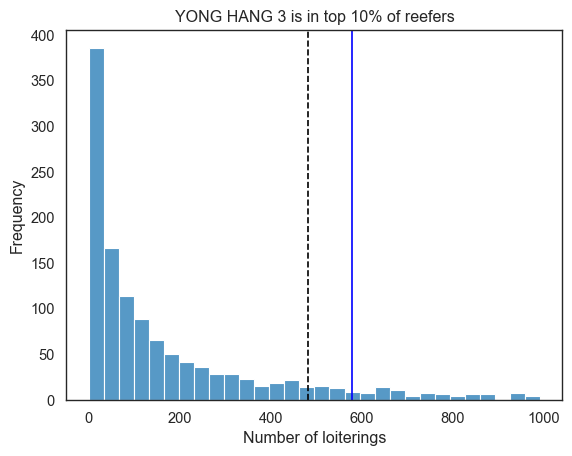

In [75]:
plot_data1 = loitering_carriers.groupby('imo')['id_event'].count().reset_index()
plot_data1 = plot_data1.loc[plot_data1['id_event']<=1000]
sns.histplot(plot_data1, x='id_event', bins=30)
plt.axvline(481,c='black',linestyle='--')
plt.axvline(578,c='blue',linestyle='-')
plt.xlabel('Number of loiterings')
plt.ylabel('Frequency')
plt.title('YONG HANG 3 is in top 10% of reefers')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/yong_hang_hist.png')
plt.show()

In [76]:
plot_data1.loc[plot_data1['imo']==9067128,:]

,imo,id_event
856,9067128.0,578


In [77]:
plot_data1.quantile(0.9)

imo         9765855.4
id_event        481.4
Name: 0.9, dtype: float64

In [83]:
encounters_carriers = encounters.merge(carriers, left_on='vessel.mmsi', right_on='mmsi', how='left',suffixes=('_event', 'carrier'))
loit_counts = loitering_carriers.groupby('imo')['id_event'].count().reset_index()
enco_counts = encounters_carriers.groupby('imo')['id_event'].count().reset_index()
loitering_encounter = enco_counts.merge(loit_counts, how='outer', on='imo', suffixes=('_encounter', '_loitering')).fillna(0)

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_14195/3800384045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data2['yong hang'] = plot_data2['imo']==9067128


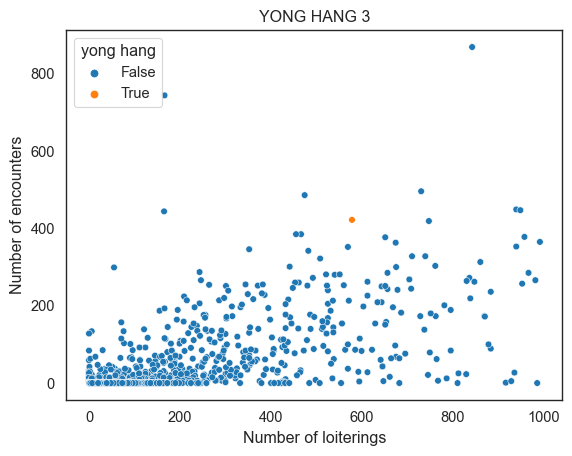

In [161]:
plot_data2 = loitering_encounter.loc[(loitering_encounter['id_event_encounter']<1000)&(loitering_encounter['id_event_loitering']<1000),:]
plot_data2['yong hang'] = plot_data2['imo']==9067128 
sns.scatterplot(plot_data2, x='id_event_loitering', y='id_event_encounter', hue='yong hang')
plt.xlabel('Number of loiterings')
plt.ylabel('Number of encounters')
plt.title('YONG HANG 3')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/yong_hang_scatter.png')
plt.show()

In [107]:
encounters_carriers.loc[encounters_carriers['imo']==9067128,'mmsi'].unique()

array([357172000])

In [114]:
yong_enc = encounters_carriers.loc[encounters_carriers['imo']==9067128,:].copy()
yong_enc['datetime'] = pd.to_datetime(yong_enc['start'])
yong_enc.columns

Index(['Unnamed: 0_event', 'id_event', 'type', 'start', 'end', 'lat', 'lon',
       'vessel.id', 'vessel.type', 'vessel.mmsi', 'vessel.name', 'vessel.flag',
       'vessel.origin_port.country', 'vessel.origin_port.name',
       'vessel.destination_port.country', 'vessel.destination_port.name',
       'vessel.authorizations.authorized', 'vessel.authorizations.unknown',
       'median_speed_knots', 'elevation_m', 'distance_from_shore_m',
       'distance_from_port_m', 'regions.rfmo', 'encounter.median_distance_km',
       'encounter.authorization_status', 'encounter.encountered_vessel.id',
       'encounter.encountered_vessel.type',
       'encounter.encountered_vessel.mmsi',
       'encounter.encountered_vessel.name',
       'encounter.encountered_vessel.flag',
       'encounter.encountered_vessel.origin_port.country',
       'encounter.encountered_vessel.origin_port.name',
       'encounter.encountered_vessel.destination_port.country',
       'encounter.encountered_vessel.destination_p

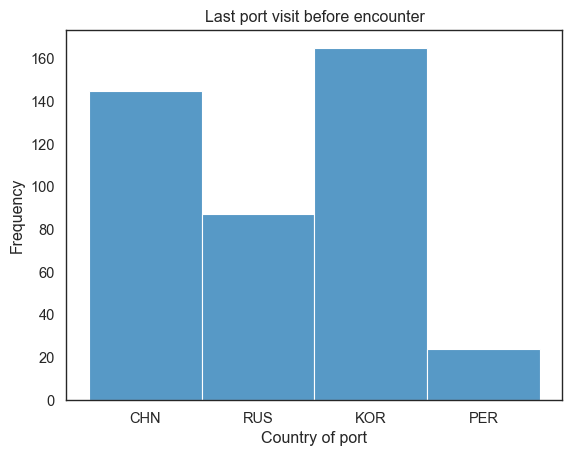

In [163]:
sns.histplot(yong_enc, x='vessel.origin_port.country')
plt.title('Last port visit before encounter')
plt.xlabel('Country of port')
plt.ylabel('Frequency')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/last_port_country.png')
plt.show()

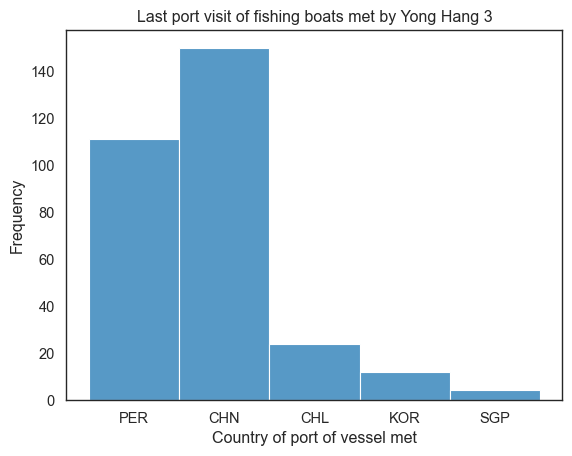

In [164]:
sns.histplot(yong_enc, x='encounter.encountered_vessel.origin_port.country')
plt.title('Last port visit of fishing boats met by Yong Hang 3')
plt.xlabel('Country of port of vessel met')
plt.ylabel('Frequency')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/yong_hong_met_boats_port.png')
plt.show()

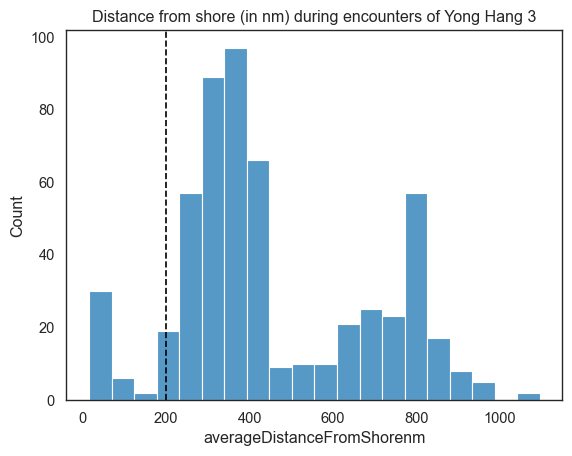

In [169]:
yong_loi = loitering_carriers.loc[loitering_carriers['imo']==9067128,:].copy()
yong_loi['averageDistanceFromShorenm'] = yong_loi['distance_from_shore_m'] /1000 / 1.852
sns.histplot(yong_loi, x='averageDistanceFromShorenm', bins=20)
plt.axvline(200,c='black',linestyle='--')
plt.title('Distance from shore (in nm) during encounters of Yong Hang 3')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/yong_hang_loi_distance.png')
plt.show()

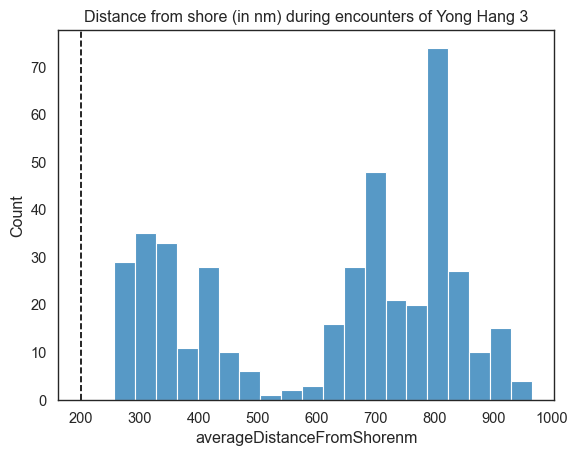

In [168]:
yong_enc['averageDistanceFromShorenm'] = yong_enc['distance_from_shore_m'] /1000 / 1.852
sns.histplot(yong_enc, x='averageDistanceFromShorenm', bins=20)
plt.axvline(200,c='black',linestyle='--')
plt.title('Distance from shore (in nm) during encounters of Yong Hang 3')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/yong_hang_enc_distance.png')
plt.show()

In [137]:
met = yong_enc['encounter.encountered_vessel.mmsi'].unique()
in_network = encounters_carriers.loc[encounters_carriers['encounter.encountered_vessel.mmsi'].isin(met),'vessel.mmsi']
in_network_top20 = in_network.value_counts().reset_index().head(20)
in_network_top20

,index,vessel.mmsi
0,357832000,702
1,351960000,500
2,412420331,480
3,357172000,422
4,354003000,347
5,412421078,240
6,353237000,236
7,351383000,222
8,370136000,208
9,412421049,200


/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_14195/892013748.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data2['in network'] = plot_data2['imo'].isin(in_network_top)


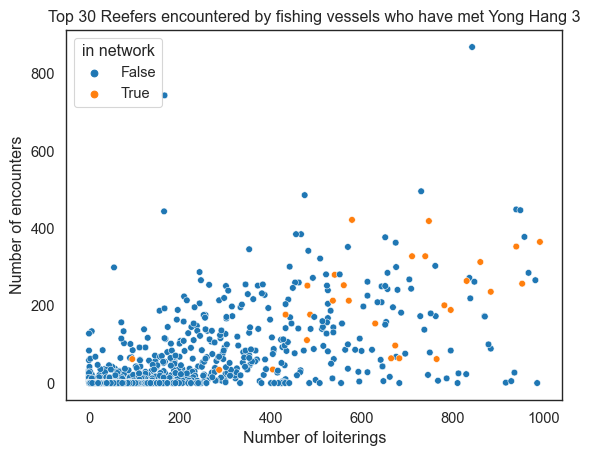

In [170]:
plot_data2 = loitering_encounter.loc[(loitering_encounter['id_event_encounter']<1000)&(loitering_encounter['id_event_loitering']<1000),:]
top_n = 30
met = yong_enc['encounter.encountered_vessel.mmsi'].unique()
in_network = encounters_carriers.loc[encounters_carriers['encounter.encountered_vessel.mmsi'].isin(met),'imo']
in_network_top = in_network.value_counts().reset_index().head(top_n+1)
in_network_top['index'] = in_network_top['index'].astype(int)
in_network_top = in_network_top.loc[in_network_top['index']!=0,'index']
plot_data2['in network'] = plot_data2['imo'].isin(in_network_top)
sns.scatterplot(plot_data2, x='id_event_loitering', y='id_event_encounter', hue='in network')
plt.xlabel('Number of loiterings')
plt.ylabel('Number of encounters')
plt.title('Top 30 Reefers encountered by fishing vessels who have met Yong Hang 3')
plt.savefig('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/network_scatter.png')
plt.show()

In [153]:
in_network_top.to_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/port_evaluation/output/topn_network.csv')

In [159]:
print(list(in_network_top), sep=',')

[9067128, 9189885, 9158537, 8410586, 8921470, 9136565, 9128037, 8609292, 8816156, 9829435, 9044358, 9271559, 8713562, 9045936, 8601551, 9019119, 9237321, 9019121, 8224432, 8609280, 9135169, 8130837, 9064229, 8911102, 9070137, 8422711, 8408870, 9686273, 8214839, 9961178]
